In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from janelia_core.ml.extra_torch_modules import Bias
from janelia_core.ml.latent_regression.subject_models import LatentRegModel
from janelia_core.ml.latent_regression.group_maps import LinearMap
from janelia_core.ml.latent_regression.group_maps import IdentityMap
from janelia_core.visualization.matrix_visualization import cmp_n_mats

## Parameters for model go here

In [4]:
d_in = [50, 70]
d_out = [20, 21]

d_proj = [2, 2]
d_trans = [2, 2]

n_smps = 10000

In [11]:
## Create the model here
n_output_groups = len(d_in)

#M = LinearMap(d_proj, d_trans)
M = IdentityMap()
S = [Bias(d_o) for d_o in d_out]
mdl = LatentRegModel(d_in, d_out, d_proj, d_trans, M, S, direct_pairs=None, w_gain=50, 
                    noise_range=[50.0, 100.0])

## Generate some x data here

In [12]:
x = [torch.randn([n_smps, d]) for d in d_in]

## Run the model forward 

In [13]:
y_pred = mdl(x)
y = mdl.generate(x)

## Fit a new model

In [32]:
M_fitted = IdentityMap()
#M_fitted = LinearMap(d_proj, d_trans)
S_fitted = [Bias(d_o) for d_o in d_out]
fitted_mdl = LatentRegModel(d_in, d_out, d_proj, d_trans, M_fitted, S_fitted, direct_pairs=None)

## Move model to cuda

In [33]:
#fitted_mdl=fitted_mdl.cuda()
#x = [x_i.pin_memory() for x_i in x]
#y = [y_i.pin_memory() for y_i in y]

In [34]:
log = fitted_mdl.fit(x, y, max_its=10000, batch_size=10, send_size=10, update_int=1000, min_var = .01,
                     learning_rates=.01, l1_u_lambda = None)

0: Elapsed fitting time 2.7894973754882812e-05, vl: 505762530.0, lr: 0.01
1000: Elapsed fitting time 1.072718858718872, vl: 15077603.0, lr: 0.01
2000: Elapsed fitting time 2.1251559257507324, vl: 4923550.5, lr: 0.01
3000: Elapsed fitting time 3.1660470962524414, vl: 3291379.0, lr: 0.01
4000: Elapsed fitting time 4.201951026916504, vl: 1418331.4, lr: 0.01
5000: Elapsed fitting time 5.239760875701904, vl: 284204.97, lr: 0.01
6000: Elapsed fitting time 6.2872772216796875, vl: 16028.097, lr: 0.01
7000: Elapsed fitting time 7.3460259437561035, vl: 910.75195, lr: 0.01
8000: Elapsed fitting time 8.388216018676758, vl: 852.40735, lr: 0.01
9000: Elapsed fitting time 9.434276819229126, vl: 727.6982, lr: 0.01
9999: Elapsed fitting time 10.529614925384521, vl: 660.7336


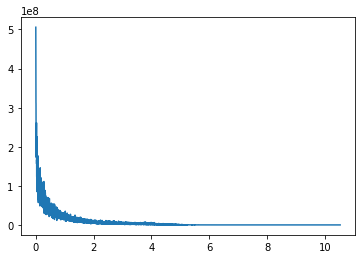

In [36]:
#%matplotlib qt
plt.figure()
plt.plot(log['elapsed_time'], log['obj'])

## Compare predictions from fitted model to ground truth

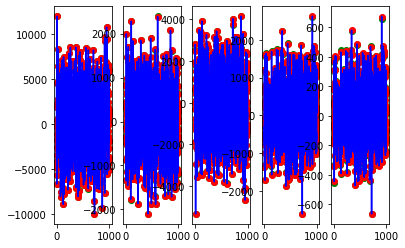

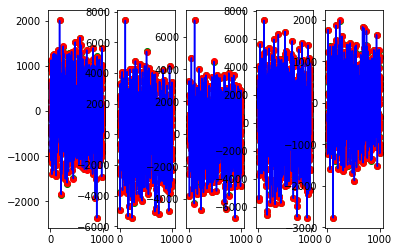

In [37]:
fitted_mdl = fitted_mdl.to('cpu')
x = [x_g.to('cpu') for x_g in x]
y = [y_h.to('cpu') for y_h in y]

plt_smps = np.arange(1000)

#%matplotlib qt
true_y_hat = mdl(x)
fitted_y_hat = fitted_mdl(x)

for g in range(n_output_groups):
    plt.figure()
    for d in range(5):
        plt.subplot(1, 5, d+1)
        true_obs_values = y[g][plt_smps, d].detach().numpy()
        true_plt_values = true_y_hat[g][plt_smps, d].detach().numpy()
        fitted_plt_values = fitted_y_hat[g][plt_smps, d].detach().numpy()
        plt.plot(true_obs_values, 'go')
        plt.plot(true_plt_values, 'ro')
        plt.plot(fitted_plt_values, 'b-')

In [24]:
import itertools

In [25]:
l1 = ['a', 'b']
l2 = ['c', 'd']

In [26]:
l3 = list(itertools.chain(l1, l2))

In [27]:
l3

['a', 'b', 'c', 'd']